# Classification. Linear models and KNN

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3]:
PATH = "./data/"

In [10]:
train_data = pd.read_csv('train.csv').set_index('PassengerId')

In [5]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [6]:
## your code
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# relationship between the gender and the survival
sex_by_survived = train_data.groupby(['Sex', 'Survived'])
sex_by_survived.size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

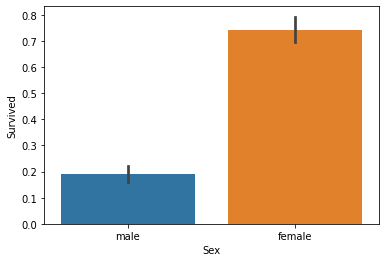

In [8]:
# relationship between the gender and the survival on the graph
sns.barplot(x='Sex', y='Survived', data=train_data)

#### Conclusion. 
##### Observation shows that there is a relation between sex and survival. The percentage of deaths among men is higher than among women

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

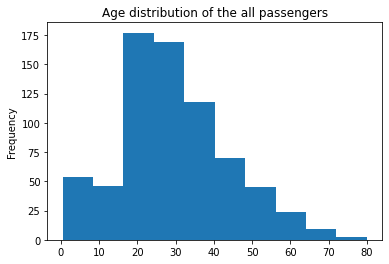

In [9]:
## your code
train_data['Age'].plot(kind="hist")
plt.title('Age distribution of the all passengers');

In [10]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# Replacing Nan in age with median
df_train = train_data.fillna(train_data.median())

In [12]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

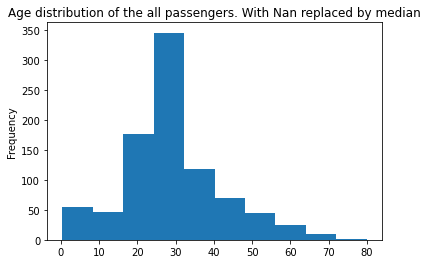

In [13]:
df_train['Age'].plot(kind="hist")
plt.title('Age distribution of the all passengers. With Nan replaced by median');

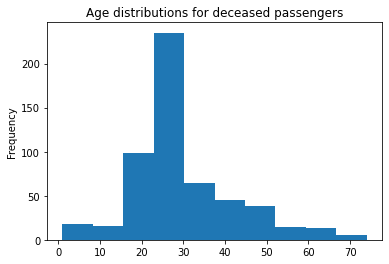

In [14]:
df_train[df_train['Survived'] == 0]['Age'].plot(kind="hist")
plt.title('Age distributions for deceased passengers');

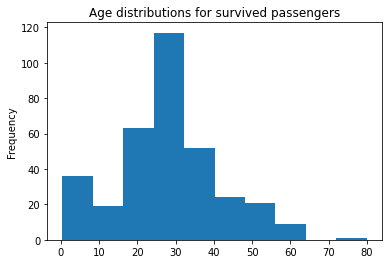

In [15]:
df_train[df_train['Survived'] == 1]['Age'].plot(kind="hist")
plt.title('Age distributions for survived passengers');

In [16]:
#  Average age of deceased passengers
df_train[df_train['Survived'] == 0] ['Age'].mean()

30.028233151183972

In [17]:
#  Average age of survived passengers
df_train[df_train['Survived'] == 1] ['Age'].mean()

28.29143274853801

In [18]:
# Median age of deceased passengers
df_train[df_train['Survived'] == 0] ['Age'].median()

28.0

In [19]:
# Median age of survived passengers
df_train[df_train['Survived'] == 1] ['Age'].median()

28.0

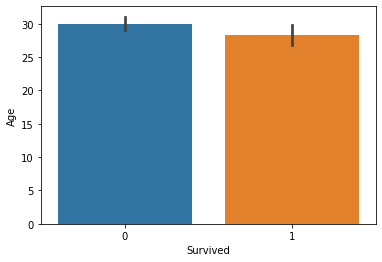

In [20]:
# Average distribution by age of surviving and deceased passengers
sns.barplot(x='Survived', y='Age', data=df_train);

#### Conclusion. 
##### As can be seen from the graphs, the age distribution of survivors and deaths in absolute numbers differs among different age groups.
##### This is due to the different number of people in the groups initially. The graphs show that most of all people died from the age of 25-30, but they also made up the majority of passengers on the ship.
##### Also in absolute terms there were more survivors in the age group under 8 years old, which is explained by the care and help of adults. Attention to children first
##### In the age group over 60, the situation is the opposite. Most of them died. What can be explained by the helplessness of the elderly. They, unlike children, did not receive such assistance.
##### There is no particular difference in overall average indicators

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [21]:
## your code
## Distribution of passengers by Pclass
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

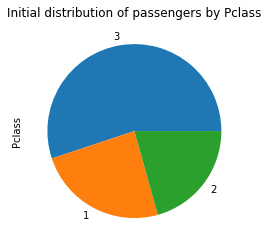

In [22]:
df_train['Pclass'].value_counts().plot.pie()
plt.title('Initial distribution of passengers by Pclass');

In [23]:
# relationship between the Pclass and the survival
Pclass_by_survived = df_train.groupby(['Pclass', 'Survived'])
Pclass_by_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

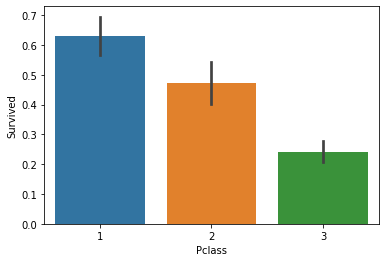

In [24]:
# relationship between the Pclass and the survival on the graph
sns.barplot(x='Pclass', y='Survived', data=df_train);

In [25]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
# Delete Nan in Embraked
df_train_finish = df_train.dropna(subset=['Embarked']).copy()
df_train_finish.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

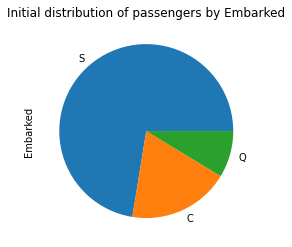

In [27]:
df_train_finish['Embarked'].value_counts().plot.pie()
plt.title('Initial distribution of passengers by Embarked');

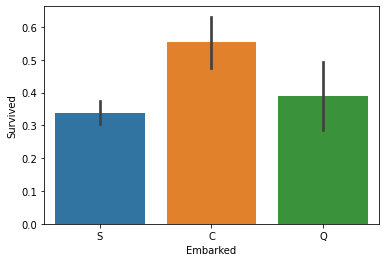

In [28]:
# relationship between the Embarked and the survival on the graph
sns.barplot(x='Embarked', y='Survived', data=df_train_finish);

#### Conclusion.
##### As you can see in the graphs, the safest class was first class. Perhaps this is due to the possibility of faster access to boats and life jackets.
##### There is also a relationship between port of embarkation and survival. The highest survival rate is observed in class C. In S and Q are about the same. Perhaps this is due to the fact that only a certain class of tickets was sold at each port. 

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [29]:
## your code
percent_Nan = train_data.isnull().sum() / len(train_data) * 100
percent_Nan

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

##### There are a lot of gaps in age and it is unacceptable to remove such values from the selection. To handle the missing age knowledge, I filled it in with the median value. As I think this is the best option.
##### There are only two missing values in Embarked and they can be deleted, since it will not affect the result.
##### The largest number of gaps in the numbering of cabins. But this is not critical, since the numbering does not affect survival.

**(2.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [30]:
y = df_train_finish['Survived']

In [31]:
## PREPARE THE FEATURES.
X = df_train_finish.drop(['Survived', 'Name', 'Cabin', 'Ticket'], axis=1).reset_index()
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,887,2,male,27.0,0,0,13.0000,S
885,888,1,female,19.0,0,0,30.0000,S
886,889,3,female,28.0,1,2,23.4500,S
887,890,1,male,26.0,0,0,30.0000,C


In [32]:
X = pd.get_dummies (X)
X.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [62]:
# TRAIN KNN-MODEL.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
# USE ACCURACY AS A METRIC.
from sklearn.metrics import confusion_matrix, accuracy_score

result_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result_knn)
result1_knn = accuracy_score(y_test,y_pred)
print("Accuracy:",result1_knn)

Confusion Matrix:
[[171  13]
 [ 84  26]]
Accuracy: 0.6700680272108843


In [65]:
# CROSS-VALIDATION.
from sklearn.model_selection import GridSearchCV

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1,15)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'knn__n_neighbors': 11}, 0.8319327731092436)

In [66]:
# USE ACCURACY AS A METRIC.
result_knn_grid = confusion_matrix(y_test, knn_grid.predict(X_test))
print("Confusion Matrix:")
print(result_knn_grid)
result1_knn_grid = accuracy_score(y_test,knn_grid.predict(X_test))
print("Accuracy:",result1_knn_grid)

Confusion Matrix:
[[160  24]
 [ 32  78]]
Accuracy: 0.8095238095238095


In [75]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 11)
#cross_val_score(knn, X, y, scoring='accuracy', cv=5).mean()

0.5456801879007174

In [ ]:
knn.fit(X_train, y_train)

knn_prediction = knn_model.predict(X_test)
accuracy_score(y_test, knn_prediction)

In [76]:
# Logreg
lr_model = LogisticRegression(solver='liblinear', penalty='l1')
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr_prediction = lr_model.predict(X_test)
accuracy_score(y_test, lr_prediction)

In [ ]:
pipeline_ss = make_pipeline(StandardScaler(), lr_model)
pipeline_ss.fit(X_train, y_train)
ss_lr_prediction = pipeline_ss.predict(X_test)

In [ ]:
accuracy_score(y_test, ss_lr_prediction)

In [77]:
result_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result_lr)
result1_lr = accuracy_score(y_test,y_pred)
print("Accuracy:",result1_lr)

Confusion Matrix:
[[171  13]
 [ 84  26]]
Accuracy: 0.6700680272108843


In [79]:
result_rf=cross_val_score(lr,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for LogisticRegression  is:',round(result_rf.mean()*100,2))

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

The cross validated score for LogisticRegression  is: 77.97


**(1.5 points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression.

In [39]:
## your code


Load the test set and make the predictions. Submit them to kaggle and see the results :)

In [50]:
## your code
test_data = pd.read_csv('test.csv').set_index('PassengerId')
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [51]:
test = test_data.drop(['Name', 'Cabin', 'Ticket'], axis=1).reset_index()
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [52]:
test = pd.get_dummies (test)
test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [53]:
test = test.fillna(train_data.median())
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [54]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,28.0,0,0,8.0500,0,1,0,0,1


In [55]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [56]:
predictions_1 = knn.predict(test)
predictions_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_1})
output.to_csv('Taras_1_submission.csv', index = False)

In [58]:
predictions_2 = knn_grid.predict(test)
predictions_2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_2})
output.to_csv('Taras_2_submission.csv', index = False)

In [81]:
predictions_3 = lr.predict(test)
predictions_3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [82]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_3})
output.to_csv('Taras_3_submission.csv', index = False)

# KAGGLE:  TARAS NAVAKHATSKA
### TITANIK SCORE 0.75837

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [15]:
insurance_data = pd.read_csv('porto_train.csv').set_index('id')

MemoryError: Unable to allocate 4.54 MiB for an array with shape (595212,) and data type int64

In [12]:
insurance_data.head()

NameError: name 'insurance_data' is not defined

Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [ ]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [ ]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [ ]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

In [ ]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [ ]:
insurance_data.describe()

As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

In [ ]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [ ]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

### AUC is the area under the ROC-curve, which is A + 1/2 on the picture below. Gini-curve and ROC-curve approximately coincide, so we have the following:
## GINI = A / (A + B) = (AUC - 1/2) / (A + B) = (AUC - 1/2) / 1/2 = 2 * AUC - 1

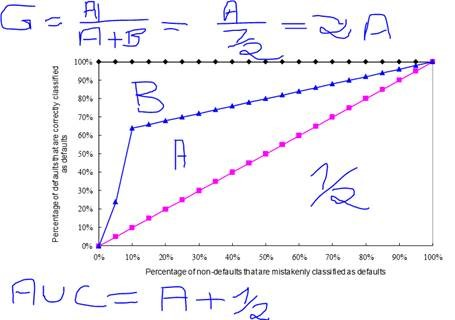

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [ ]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [ ]:
gini_normalized(y_valid, y_pred)

**(1.5 points + X bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
X bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [ ]:
## your code